In [1]:
raw_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/raw/'
processed_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/processed/'
interim_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/interim/'
figures_dir = '/home/grace/Documents/python/ttc_inhalation/reports/figures/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
ClassIII_rep_ppm = pd.read_csv(processed_dat_dir+'ClassIII_rep_ppm.csv')
ClassIII_rep_mgm3 = pd.read_csv(processed_dat_dir+'ClassIII_rep_mgm3.csv')

ClassII_rep_ppm = pd.read_csv(processed_dat_dir+'ClassII_rep_ppm.csv')
ClassII_rep_mgm3 = pd.read_csv(processed_dat_dir+'ClassII_rep_mgm3.csv')

ClassI_rep_ppm = pd.read_csv(processed_dat_dir+'ClassI_rep_ppm.csv')
ClassI_rep_mgm3 = pd.read_csv(processed_dat_dir+'ClassI_rep_mgm3.csv')

In [5]:
xls = pd.read_excel(raw_dat_dir+'Escher_2010_Appendix_A.xlsx')

In [11]:
xls.head()

,CAS,Name,Author/review,Publication,Year,Cramer_class,Study duration,Genotoxicity Alert,OP,General_NOEC_ppm,Systemic_NOEC_ppm,Local_NOEC_ppm
0,50000,Formaldehyde,Woutersen et al.,J. Appl. Toxicol.,1989.0,1,chronic,NaN,NaN,1.02,1.02,1.02
1,57556,Propylene glycol,La Kind et al.,CRC Crit. Rev. Toxicol.,1999.0,1,subchronic,NaN,NaN,25.70,160.70,25.70
2,64186,Formic acid,NTP,TOX 19,1992.0,1,subchronic,NaN,NaN,1.33,1.33,4.00
3,67561,Methanol,Andrews et al.,J. Toxicol. Environ. Health,1987.0,1,subacute,NaN,NaN,28.20,84.60,28.20
4,67630,2-Propanol,Burleigh-Flayer et al.,Fundam. Appl. Toxicol.,1997.0,1,chronic,NaN,NaN,166.80,166.80,NaN


In [21]:
import re

In [92]:
cas = re.findall(r'\d$', item)


In [136]:
mylst = []
xls['CAS#'] = [str(e) for e in xls.CAS]
for item in xls['CAS#']:
    for e in item.split():
        a = e[-1]
        b = e[-3]+e[-2]
        c = e[:-3]
        d = c + '-' + b+ '-' +a
        mylst.append(d)
xls['INPUT'] = mylst

In [141]:
xls.shape

(203, 14)

In [96]:
escher_smi = pd.read_csv(raw_dat_dir+'Escher_2010_Appendix_A_SMILES.tsv', sep= '\t')

In [97]:
escher_smi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
INPUT                203 non-null object
FOUND_BY             203 non-null object
DTXSID               203 non-null object
PREFERRED_NAME       203 non-null object
SMILES               203 non-null object
AVERAGE_MASS         203 non-null float64
QSAR_READY_SMILES    203 non-null object
dtypes: float64(1), object(6)
memory usage: 11.2+ KB


In [140]:
escher_smi.shape

(203, 7)

In [138]:
escher = pd.merge(xls, escher_smi, on = 'INPUT', how = 'left')

In [145]:
escher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 20 columns):
CAS                   203 non-null int64
Name                  203 non-null object
Author/review         203 non-null object
Publication           203 non-null object
Year                  200 non-null float64
Cramer_class          203 non-null int64
Study duration        203 non-null object
Genotoxicity Alert    65 non-null object
OP                    14 non-null object
General_NOEC_ppm      203 non-null float64
Systemic_NOEC_ppm     199 non-null float64
Local_NOEC_ppm        102 non-null float64
CAS#                  203 non-null object
INPUT                 203 non-null object
FOUND_BY              203 non-null object
DTXSID                203 non-null object
PREFERRED_NAME        203 non-null object
SMILES                203 non-null object
AVERAGE_MASS          203 non-null float64
QSAR_READY_SMILES     203 non-null object
dtypes: float64(5), int64(2), object(13)
memory usage:

In [14]:
print(xls['Genotoxicity Alert'].unique())
print(xls['OP'].unique())

[nan 'Genotox Alert']
[nan 'OP']


In [146]:
mask1 = (escher['Cramer_class'] == 1) 
mask3 = (escher['Cramer_class'] == 3) 


In [147]:
escher1 = escher[mask1]

In [151]:
cc

/home/grace/anaconda3/envs/clone_newchem/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


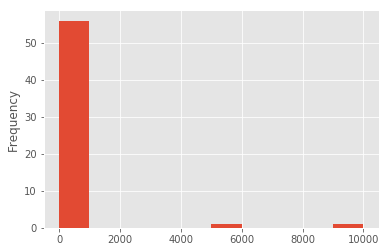

In [154]:
plt.style.use('ggplot')
escher1.General_NOEC_mgm3.plot(kind = 'hist')

In [155]:
escher1['logNOEC_mgm3'] = np.log10(escher1['General_NOEC_mgm3'])

/home/grace/anaconda3/envs/clone_newchem/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


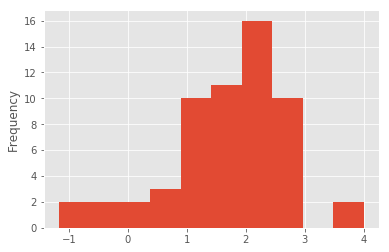

In [156]:
escher1['logNOEC_mgm3'].plot(kind = 'hist')

### Computing the percentiles and TTC values for the Escher set

In [160]:
pct1 = 10**np.percentile(escher1['logNOEC_mgm3'],5)

In [164]:
dex = (6/24)*(5/7)
V = 20
bw = 60

In [165]:
TTCmgm31 = (pct1*dex)/(10*2.5)

In [166]:
NOEL1 = pct1*dex *(V/bw)*1000
TTC_1 = (NOEL1*bw)/(10*2.5)

In [191]:
print(TTC_1)
print(TTCmgm31)

91.4408756552113
0.004572043782760565


In [168]:
escher3 = escher[mask3]

In [169]:
escher3['General_NOEC_mgm3'] = (escher3['General_NOEC_ppm'] * escher3['AVERAGE_MASS'])/24.45

/home/grace/anaconda3/envs/clone_newchem/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
escher3['logNOEC_mgm3'] = np.log10(escher3['General_NOEC_mgm3'])

/home/grace/anaconda3/envs/clone_newchem/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/grace/anaconda3/envs/clone_newchem/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [184]:
escher3a = escher3[escher3['General_NOEC_mgm3'] !=0]


In [192]:
escher3a.shape

(137, 22)

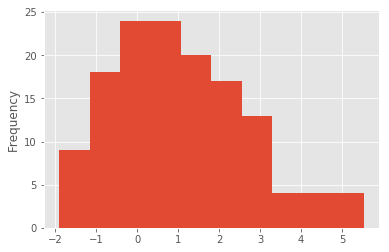

In [185]:
escher3a['logNOEC_mgm3'].plot(kind = 'hist')

In [186]:
pct3 = 10**np.percentile(escher3a['logNOEC_mgm3'],5)

In [187]:
TTCmgm33 = (pct3*dex)/(10*2.5)

In [188]:
NOEL3 = pct3*dex *(V/bw)*1000
TTC_3 = (NOEL3*bw)/(10*2.5)

In [190]:
print(TTC_3)
print(TTCmgm33)

5.564109206942473
0.0002782054603471237


### Carthew data

In [194]:
carthew_smi =pd.read_csv(raw_dat_dir+'Carthew_2009_Appendix_A_SMILES.tsv', sep= '\t')

In [196]:
carthew =pd.read_excel(raw_dat_dir+'Carthew_2009_Appendix_A.xlsx')

In [212]:
carthew.shape

(92, 9)

In [199]:
#carthew_smi.head()

In [200]:
carthew['NOAEL_mgm3'] = carthew['Systemic NOAEL (mg/kg/day)']/(dex*(V/bw))

In [202]:
carthew['log_NOAEL_mgm3'] = np.log10(carthew['NOAEL_mgm3'])

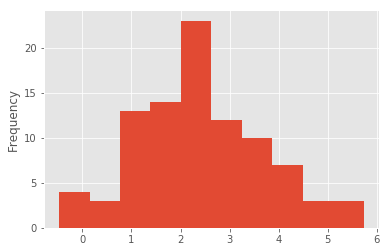

In [203]:
carthew['log_NOAEL_mgm3'].plot(kind = 'hist')

In [205]:
carthew['Cramer_class'].unique()

c_mask1 = carthew['Cramer_class'] == 1
c_mask3 = carthew['Cramer_class'] == 3

carthew1 = carthew[c_mask1]
carthew3 = carthew[c_mask3]

In [206]:
carth_pct1 = 10**np.percentile(carthew1['log_NOAEL_mgm3'],5)
carth_pct3 = 10**np.percentile(carthew3['log_NOAEL_mgm3'],5)

In [207]:
print(carth_pct1)
print(carth_pct3)

6.05640310874478
1.0149444590861494


In [208]:
c1TTCmgm3 = (carth_pct1*dex)/(10*2.5)
NOELc1 = carth_pct1*dex *(V/bw)*1000
TTC_c1 = (NOELc1*bw)/(10*2.5)

In [209]:
print(TTC_c1)
print(c1TTCmgm3)

865.2004441063971
0.043260022205319854


In [210]:
c3TTCmgm3 = (carth_pct3*dex)/(10*2.5)
NOELc3 = carth_pct3*dex *(V/bw)*1000
TTC_c3 = (NOELc3*bw)/(10*2.5)

In [211]:
print(TTC_c3)
print(c3TTCmgm3)

144.99206558373564
0.007249603279186782


In [214]:
carthew3.shape

(50, 9)